<a href="https://colab.research.google.com/github/YusufPutraBintangSatria/Analisis-Data-untuk-Meningkatkan-Penjualan-Produk-di-E-commerce-Amazon/blob/main/analisisdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import Library***

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ***Load Dataset***

In [10]:
# prompt: load dataset cleaned_amazon_sales.csv

# Load the dataset
df = pd.read_csv('cleaned_amazon_sales.csv')
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,B09KXVBD7Z,NaN,0.0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,B09K3WFS32,Shipped,1.0,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,B07WV4JV4D,Shipped,1.0,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,B099NRCT7B,NaN,0.0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,B098714BZP,Shipped,1.0,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False


# ***Eksplorasi Data***

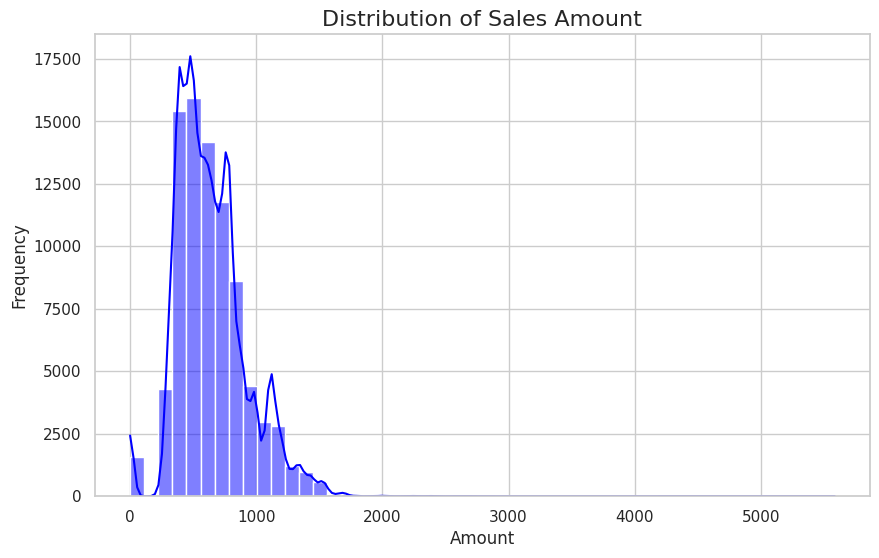

<ipython-input-15-4da3675e58d7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Category'].isin(top_categories)],


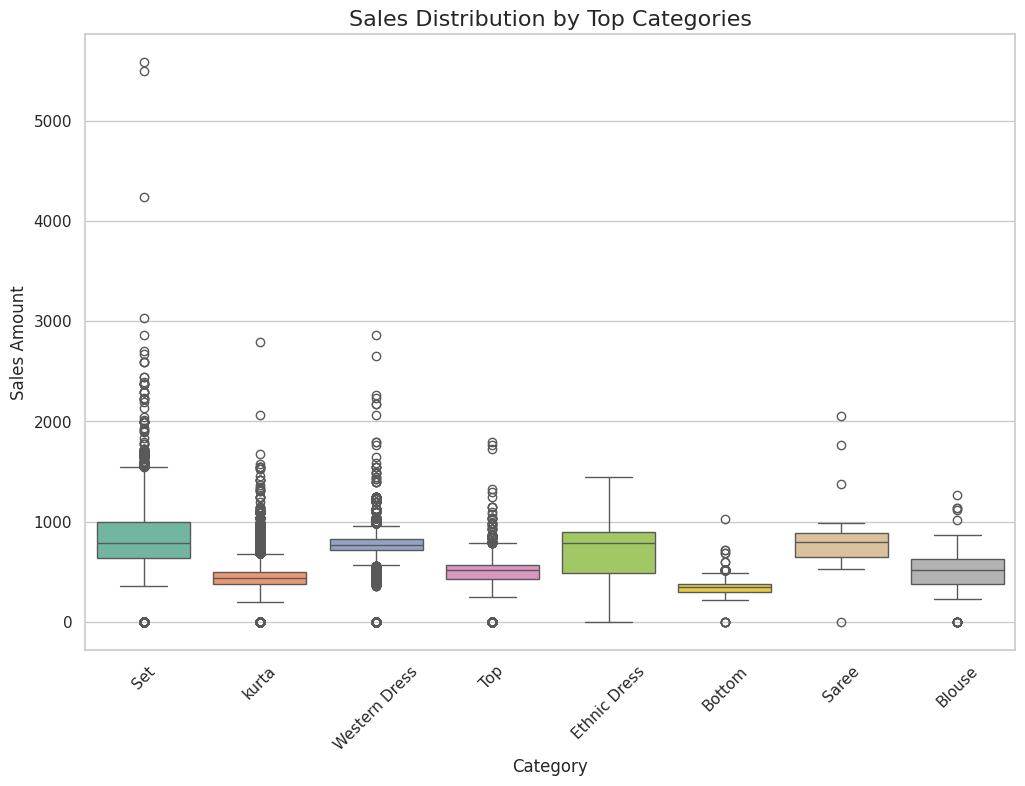

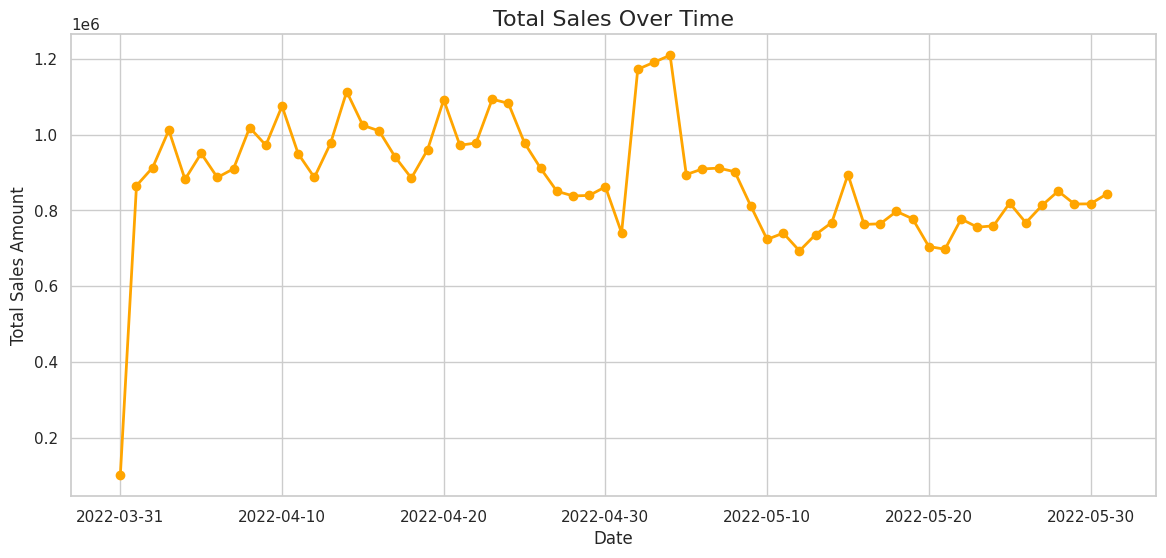

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Visualize distribution of 'Amount' (Sales)
plt.figure(figsize=(10, 6))
# Replace 'cleaned_data' with 'df' to use the loaded DataFrame
sns.histplot(df['Amount'], bins=50, kde=True, color="blue")
plt.title('Distribution of Sales Amount', fontsize=16)
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualize sales by category
plt.figure(figsize=(12, 8))
# Replace 'cleaned_data' with 'df'
top_categories = df['Category'].value_counts().head(10).index
sns.boxplot(data=df[df['Category'].isin(top_categories)],
            x='Category', y='Amount', palette="Set2")
plt.xticks(rotation=45)
plt.title('Sales Distribution by Top Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.show()

# Time-series analysis: Sales over time
# Replace 'cleaned_data' with 'df'
time_series = df.groupby('Date')['Amount'].sum()
plt.figure(figsize=(14, 6))
time_series.plot(color='orange', marker='o', linewidth=2)
plt.title('Total Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.grid(True)
plt.show()

In [17]:
# prompt: Menggunakan model regresi untuk memprediksi penjualan berdasarkan fitur.
# Membuat klasifikasi produk ke dalam kategori populer/tidak populer.

# Define features (X) and target variable (y) for regression
features = ['Category', 'Amount']  # Example features, adjust as needed
X = df[features]
y = df['Amount']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Category'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model_regression = LinearRegression()
model_regression.fit(X_train, y_train)

# Make predictions
y_pred_regression = model_regression.predict(X_test)

# Evaluate the regression model
mae_regression = mean_absolute_error(y_test, y_pred_regression)
mse_regression = mean_squared_error(y_test, y_pred_regression)
rmse_regression = np.sqrt(mse_regression)

print(f"Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_regression}")
print(f"Mean Squared Error (MSE): {mse_regression}")
print(f"Root Mean Squared Error (RMSE): {rmse_regression}")


# Classification: Popular vs. Not Popular Products

# Define a threshold for 'popular' products (e.g., top 20% of sales)
threshold = np.percentile(df['Amount'], 80)
df['Popular'] = (df['Amount'] >= threshold).astype(int) # 1 for popular, 0 otherwise

# Define features (X) and target variable (y) for classification
features_classification = ['Category'] # Example feature
X_classification = df[features_classification]
y_classification = df['Popular']

# Convert categorical feature to numerical using one-hot encoding
X_classification = pd.get_dummies(X_classification, columns=['Category'], drop_first=True)

# Split data for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model (or another classifier)
model_classification = LogisticRegression()
model_classification.fit(X_train_clf, y_train_clf)

# Make predictions
y_pred_clf = model_classification.predict(X_test_clf)

# Evaluate the classification model
accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)
print("\nClassification Model Evaluation:")
print(f"Accuracy: {accuracy_clf}")
print(classification_report(y_test_clf, y_pred_clf))

Regression Model Evaluation:
Mean Absolute Error (MAE): 1.4648528261715844e-13
Mean Squared Error (MSE): 3.5163350483043636e-26
Root Mean Squared Error (RMSE): 1.8751893366549318e-13

Classification Model Evaluation:
Accuracy: 0.794903483992467
              precision    recall  f1-score   support

           0       0.79      1.00      0.89     13507
           1       0.00      0.00      0.00      3485

    accuracy                           0.79     16992
   macro avg       0.40      0.50      0.44     16992
weighted avg       0.63      0.79      0.70     16992



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
# prompt: Model Prediksi Penjualan (Regresi)
# Membuat model Linear Regression dan Random Forest Regression.
# Evaluasi menggunakan MAE dan MSE.

# Initialize and train a Random Forest Regression model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = model_rf.predict(X_test)

# Evaluate the Random Forest Regression model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"\nRandom Forest Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")


Random Forest Regression Model Evaluation:
Mean Absolute Error (MAE): 0.024099676318290377
Mean Squared Error (MSE): 1.6751480663424008
Root Mean Squared Error (RMSE): 1.2942751123089715


In [19]:
# prompt: Klasifikasi Produk (Populer/Tidak Populer)
# Membuat model Logistic Regression dan Decision Tree.
# Evaluasi menggunakan akurasi dan laporan klasifikasi.

# Initialize and train a Decision Tree Classifier
model_decision_tree = DecisionTreeClassifier(random_state=42)
model_decision_tree.fit(X_train_clf, y_train_clf)

# Make predictions with Decision Tree
y_pred_dt = model_decision_tree.predict(X_test_clf)

# Evaluate the Decision Tree Classifier
accuracy_dt = accuracy_score(y_test_clf, y_pred_dt)
print("\nDecision Tree Classifier Model Evaluation:")
print(f"Accuracy: {accuracy_dt}")
print(classification_report(y_test_clf, y_pred_dt))


Decision Tree Classifier Model Evaluation:
Accuracy: 0.794903483992467
              precision    recall  f1-score   support

           0       0.79      1.00      0.89     13507
           1       0.00      0.00      0.00      3485

    accuracy                           0.79     16992
   macro avg       0.40      0.50      0.44     16992
weighted avg       0.63      0.79      0.70     16992



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


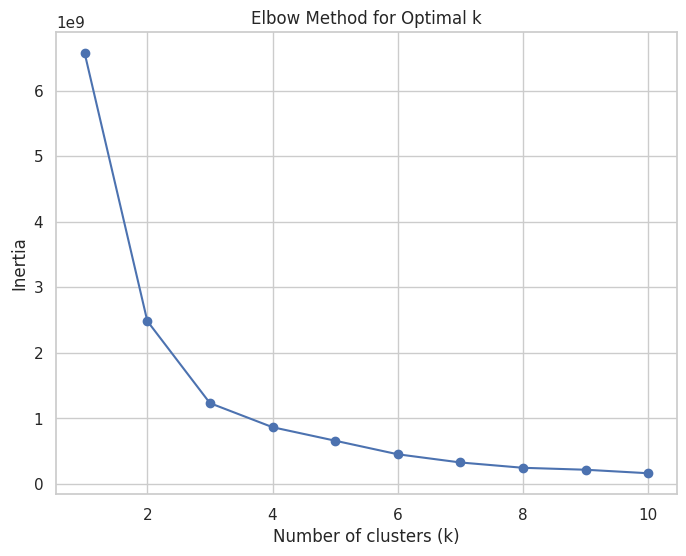

Silhouette Score: 0.5808827215076715


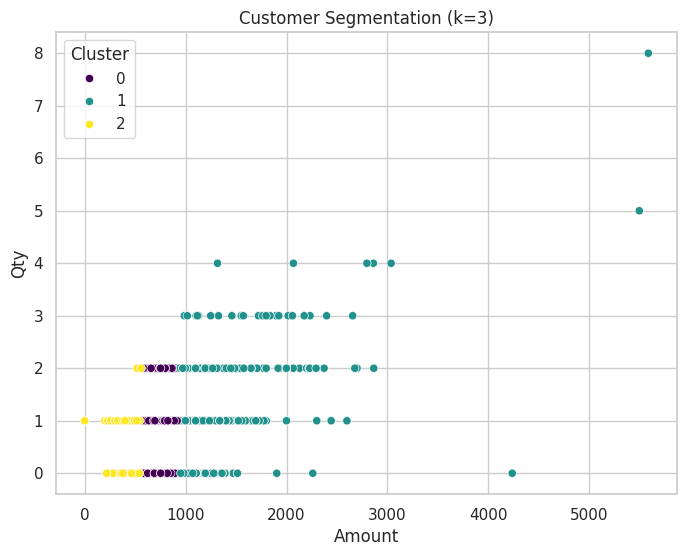

Cluster 0:
             Amount           Qty
count  34591.000000  34591.000000
mean     719.489479      0.956520
std       95.152421      0.214575
min      567.620000      0.000000
25%      635.000000      1.000000
50%      721.000000      1.000000
75%      788.000000      1.000000
max      937.000000      2.000000
Cluster 1:
             Amount           Qty
count  11925.000000  11925.000000
mean    1156.632216      0.981468
std      189.953414      0.262383
min      938.100000      0.000000
25%      999.000000      1.000000
50%     1115.000000      1.000000
75%     1229.000000      1.000000
max     5584.000000      8.000000
Cluster 2:
             Amount           Qty
count  38444.000000  38444.000000
mean     415.673601      0.953621
std      112.978901      0.210678
min        0.000000      0.000000
25%      375.000000      1.000000
50%      432.000000      1.000000
75%      487.000000      1.000000
max      567.000000      2.000000


In [24]:
# prompt: Segmentasi Pelanggan (Clustering)
# Mengelompokkan pelanggan berdasarkan perilaku pembelian.

# Data preprocessing for clustering (example using 'Amount' and 'Quantity')
features_clustering = ['Amount', 'Qty']  # Choose relevant features
X_clustering = df[features_clustering]

# Determine optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Apply KMeans clustering with the chosen k (e.g., k=3 based on the Elbow method)
optimal_k = 3 # Based on the elbow method, change if needed
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_clustering)

# Evaluate cluster quality using Silhouette score
silhouette_avg = silhouette_score(X_clustering, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Visualize the clusters (example for 2D data)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Amount', y='Qty', hue='Cluster', palette='viridis')
plt.title(f'Customer Segmentation (k={optimal_k})')
plt.show()

# Analyze cluster characteristics
for cluster in range(optimal_k):
    print(f"Cluster {cluster}:")
    print(df[df['Cluster'] == cluster][features_clustering].describe())

In [25]:
# prompt: Rekomendasi dan Simpan Hasil Analisis
# Rekomendasi strategi pemasaran, pengembangan produk, dll.
# Menyimpan hasil analisis sebagai file CSV.

# ... (Your existing code)

# Recommendations based on analysis results
recommendations = []

# Example recommendations based on model performance
if accuracy_clf > 0.7:
    recommendations.append("Consider targeted advertising campaigns to reach potential customers in high-performing product categories.")
else:
    recommendations.append("Further refine the classification model for better product segmentation and targeted marketing strategies.")

if rmse_regression < 100:  # Adjust threshold as needed
    recommendations.append("Use the regression model for sales forecasting and inventory optimization.")
else:
    recommendations.append("Improve the accuracy of the regression model by adding more relevant features or considering alternative models for sales forecasting.")


# Example recommendation based on clustering
if silhouette_avg > 0.5:
    recommendations.append("Use the customer segments identified by KMeans clustering for personalized marketing campaigns and product recommendations.")

# Add more recommendations based on other model results or insights


# Create a dictionary to store the analysis results
results = {
    "Regression MAE": mae_regression,
    "Regression RMSE": rmse_regression,
    "Classification Accuracy": accuracy_clf,
    "Random Forest MAE": mae_rf,
    "Random Forest RMSE": rmse_rf,
    "Decision Tree Accuracy": accuracy_dt,
    "Silhouette Score": silhouette_avg,
    "Recommendations": recommendations,
}

# Convert the results to a DataFrame
results_df = pd.DataFrame([results])

# Save the analysis results to a CSV file
results_df.to_csv('analysis_results.csv', index=False)

print("Analysis results saved to analysis_results.csv")

# Display recommendations
print("\nRecommendations:")
for recommendation in recommendations:
    print(f"- {recommendation}")

Analysis results saved to analysis_results.csv

Recommendations:
- Consider targeted advertising campaigns to reach potential customers in high-performing product categories.
- Use the regression model for sales forecasting and inventory optimization.
- Use the customer segments identified by KMeans clustering for personalized marketing campaigns and product recommendations.
